In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import lloyd_python as lp
import cv2

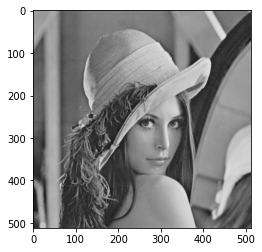

In [2]:
img1 = plt.imread('lena512.tif') # Read an image
plt.imshow(img1) # Show the original image
plt.show()

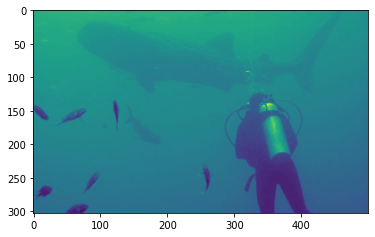

In [3]:
img2 = plt.imread('diver.tif') # Read an image
plt.imshow(img2) # Show the original image
plt.show()

In [4]:
# preprocess
def preprocess(img):
    new_img=[]
    for i in range(img.shape[0]):
        temp=[]
        for j in range(img.shape[1]):
            temp.append(img[i][j][0])
        new_img.append(temp)
    new_img=np.array(new_img)   
    return new_img

In [5]:
new_img1=preprocess(img1)

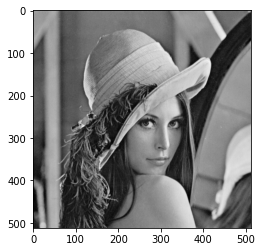

In [6]:
plt.imshow(new_img1,cmap="gray") 
plt.show()

In [7]:
a=np.linspace(start = 0, stop = 255, num = 3)
print(a)

[  0.  127.5 255. ]


In [8]:
def uniform_quantization(img2,scaler):
    partition=np.linspace(start = 0, stop = 255, num = scaler+2)
    partitoin=np.round(partition)
    img=copy.deepcopy(img2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j]=return_interval(img[i][j],partition, partition)
    return img

In [9]:
def lloyds(img2,scaler):
    img=copy.deepcopy(img2)
    width=img.shape[0]
    length=img.shape[1]
    img=np.reshape(img, (-1,1))
    partition, codebook= lp.lloyds(img, [scaler*1])
    partition= np.round(partition)
    codebook=np.round(codebook)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j]=return_interval(img[i][j],partition, codebook)
    return np.reshape(img,(width,length))
            

In [10]:
def return_interval(value,partition, codebook):
    if value<=partition[0]:
        return codebook[0]
    elif value>=partition[-1]:
        return codebook[-1]
    else:
        for i in range(len(partition)-1):
            if partition[i]<value<=partition[i+1]:
                return codebook[i+1]


In [11]:
def MSE_value(lena512_original1,diver_original1):
    lena512_original=copy.deepcopy(lena512_original1)
    diver_original=copy.deepcopy(diver_original1)
    fig,axs=plt.subplots(3,2,figsize=(15,15))
    lena512_uniform=[]
    lena512_Lloyd=[]
    diver_uniform=[]
    diver_Lloyd=[]
    x1=np.linspace(1,7,7)
    for i in range(1,8):
        # for lena512
        temp_uniform=uniform_quantization(lena512_original,i)
        temp_lloyds=lloyds(lena512_original,i+1)
        lena512_uniform.append(caculate(temp_uniform,lena512_original))
        lena512_Lloyd.append(caculate(temp_lloyds,lena512_original))
        
        # for diver
        temp_uniform=uniform_quantization(diver_original,i)
        temp_lloyds=lloyds(diver_original,i+1)
        diver_uniform.append(caculate(temp_uniform,diver_original))
        diver_Lloyd.append(caculate(temp_lloyds,diver_original))

    
    print(" First image is lena512 image and second image is diver image")
    axs[0][0].plot(x1,lena512_uniform)# blue
    axs[0][0].plot(x1, lena512_Lloyd)
    axs[0][0].legend(["uniform","Lloyd"])

    axs[0][1].plot(x1,diver_uniform)
    axs[0][1].plot(x1,diver_Lloyd)   
    axs[0][1].legend(["uniform","Lloyd"])
 
    axs[1][0].plot(x1,lena512_uniform)# blue
    axs[1][1].plot(x1, lena512_Lloyd)
    axs[1][0].legend(["uniform"])
    axs[1][1].legend(["Lloyd"])
    
    axs[2][0].plot(x1,diver_uniform)
    axs[2][1].plot(x1,diver_Lloyd)   
    axs[2][0].legend(["uniform"])
    axs[2][1].legend(["Lloyd"])

In [12]:
def caculate(img,img_original):
    assert img.shape[0]==img_original.shape[0]
    assert img.shape[1]==img_original.shape[1]
    a=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
             a1=int(img_original[i][j])
             b=int(img[i][j])
             c=a1-b
             result=abs(c)**2
             a.append(result)
    a=np.array(a)
    a=a/int(img.shape[0]*img.shape[1])
    return sum(a)

In [13]:
img_copy=copy.deepcopy(new_img1)


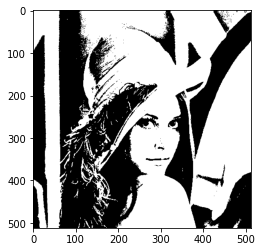

In [14]:
# use 1 bin
img_copy2=lloyds(img_copy,2)
plt.imshow(img_copy2,cmap="gray") 
plt.show()

In [15]:
# use 1 bins
img_copy1=uniform_quantization(img_copy,1)

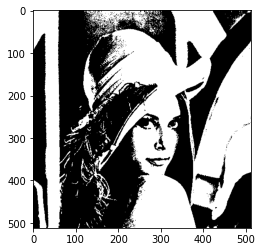

In [16]:
plt.imshow(img_copy1,cmap="gray") 
plt.show()

 First image is lena512 image and second image is diver image


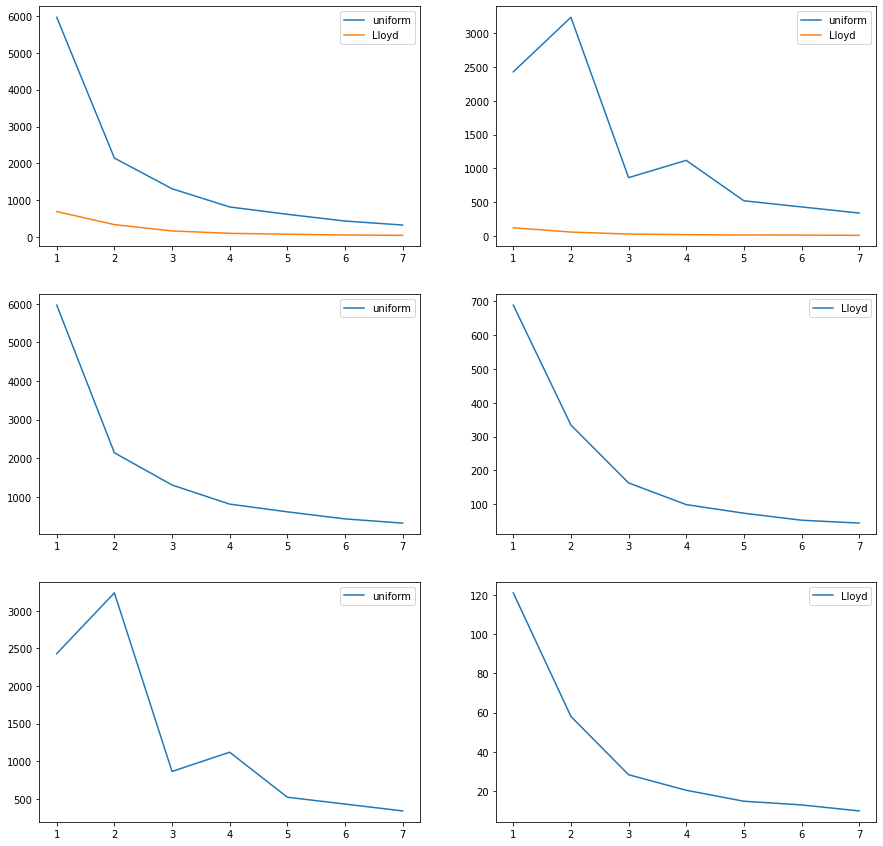

In [17]:
MSE_value(new_img1,img2)

In [18]:
lena512_eh = cv2.equalizeHist(new_img1)
diver_eh = cv2.equalizeHist(img2)

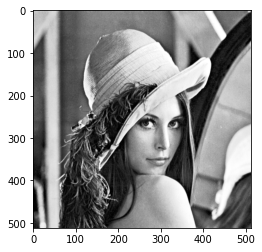

In [19]:
plt.imshow(lena512_eh,cmap="gray") 
plt.show()

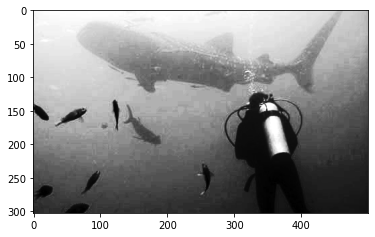

In [20]:
plt.imshow(diver_eh,cmap="gray") 
plt.show()

 First image is lena512 image and second image is diver image


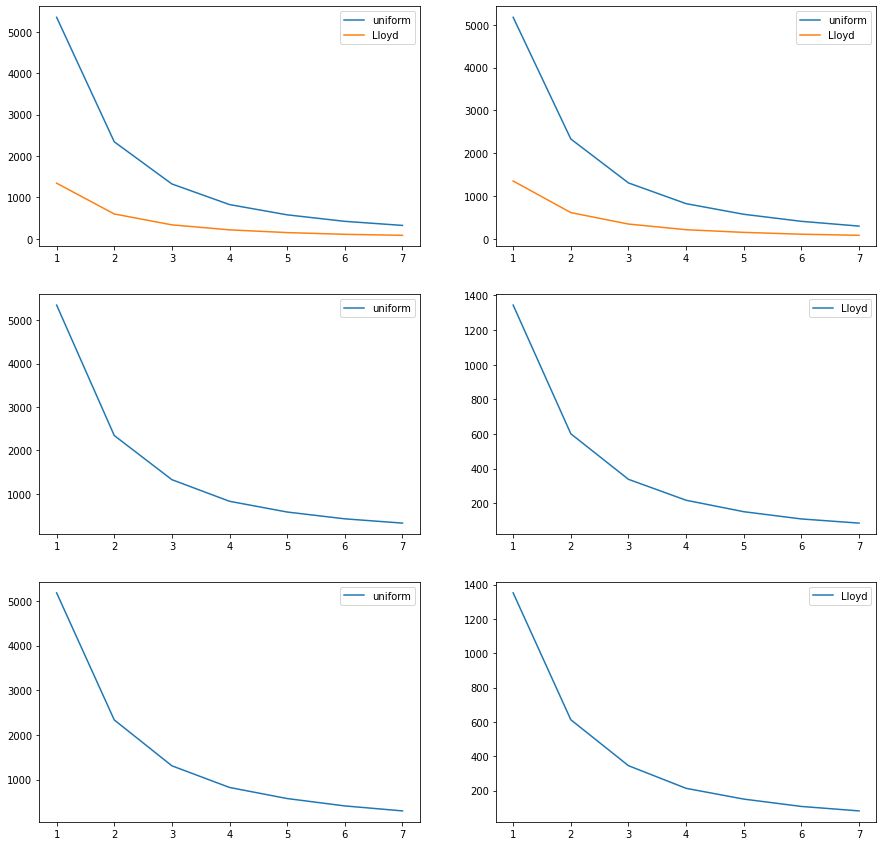

In [21]:
MSE_value(lena512_eh,diver_eh)